In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import scale

print("TensorFlow版本:", tf.__version__)

TensorFlow版本: 2.0.0


In [2]:
# 读取数据文件
df = pd.read_csv("boston_data/boston.csv", header=0)
#显示数据摘要描述信息
print(df.describe())

             CRIM         ZN       INDUS         CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

In [3]:
#获取df的值
ds = df.values
print(ds, ds.shape)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 7.8800e+00 1.1900e+01]] (506, 13)


In [4]:
x_data = ds[:,:12]
y_data = ds[:,12]
print('x_data shape=', x_data.shape)
print('y_data shape=', y_data.shape)

x_data shape= (506, 12)
y_data shape= (506,)


In [5]:
train_num = 300 #训练集的数目
valid_num = 100 #验证集的数目
test_num = len(x_data) - train_num - valid_num #测试集的数目 = 506 - 训练集的数目 - 验证集的数目
#训练集划分
x_train = x_data[:train_num]
y_train = y_data[:train_num]
#验证集划分
x_valid = x_data[train_num:train_num+valid_num]
y_valid = y_data[train_num:train_num+valid_num]
#测试集划分
x_test = x_data[train_num+valid_num:train_num+valid_num+test_num]
y_test = y_data[train_num+valid_num:train_num+valid_num+test_num]

In [6]:
x_train = tf.cast(scale(x_train), dtype=tf.float32)
x_valid = tf.cast(scale(x_valid), dtype=tf.float32)
x_test = tf.cast(scale(x_test), dtype=tf.float32)
print(x_train)
print(x_valid)
print(x_test)

tf.Tensor(
[[-0.6411311   0.10080399 -1.0306702  ... -0.23254429 -1.002688
  -0.92348367]
 [-0.60977125 -0.5935092  -0.28321603 ... -1.0152614   0.09274682
  -0.25234807]
 [-0.6098011  -0.5935092  -0.28321603 ... -1.0152614   0.09274682
  -1.0767478 ]
 ...
 [-0.43986905 -0.5935092   0.79242706 ... -0.33400762 -0.6959663
   0.82856745]
 [-0.55396885  2.1065977  -1.0416622  ...  0.6661309  -1.221775
  -0.925097  ]
 [-0.5674899   2.1065977  -1.0416622  ...  0.6661309  -1.221775
  -0.962203  ]], shape=(300, 12), dtype=float32)
tf.Tensor(
[[-0.51401335  2.5123856  -1.3275611  ... -0.5659268  -3.1720748
  -0.8521243 ]
 [-0.51481354  0.9705192  -0.7470566  ... -0.7222452  -2.2460256
  -0.4235507 ]
 [-0.5096042   0.9705192  -0.7470566  ... -0.7222452  -2.2460256
  -0.527258  ]
 ...
 [ 0.17957704 -0.48568788  1.0638161  ...  1.0942832   0.67459124
   0.8784135 ]
 [ 2.9692492  -0.48568788  1.0638161  ...  1.0942832   0.67459124
   2.2116148 ]
 [ 0.3836692  -0.48568788  1.0638161  ...  1.0942832 

In [7]:
def model(x, w, b):
    return tf.matmul(x, w) + b

In [8]:
W = tf.Variable(tf.random.normal([12, 1], mean=0.0, stddev=1.0, dtype=tf.float32))
B = tf.Variable(tf.zeros(1), dtype=tf.float32)
print(W)
print(B)

<tf.Variable 'Variable:0' shape=(12, 1) dtype=float32, numpy=
array([[-2.221926  ],
       [ 1.1049852 ],
       [ 0.33635488],
       [ 0.1398425 ],
       [ 1.0670258 ],
       [-0.79673976],
       [-0.93939435],
       [-0.48741922],
       [-1.8018117 ],
       [-1.1869967 ],
       [-0.07573865],
       [-0.0952025 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [9]:
training_epochs = 50
learning_rate = 0.01
batch_size = 10

In [10]:
#采用均方差作为损失函数
def loss(x, y, w, b):
    err = model(x, w, b) - y
    squared_err = tf.square(err)
    return tf.reduce_mean(squared_err)

In [11]:
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)
    return tape.gradient(loss_, [w, b])

In [12]:
optimizer = tf.keras.optimizers.SGD(learning_rate)

In [13]:
loss_list_train =[]
loss_list_valid =[]
total_step = int(train_num/batch_size)

for epoch in range(training_epochs):
    for step in range(total_step):
        xs = x_train[step*batch_size:(step+1)*batch_size,:]
        ys = y_train[step*batch_size:(step+1)*batch_size]
        
        grads = grad(xs, ys, W, B)
        optimizer.apply_gradients(zip(grads, [W, B]))
    
    loss_train = loss(x_train, y_train, W, B).numpy()
    loss_valid = loss(x_valid, y_valid, W, B).numpy()
    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)
    print("epoch={:3d},train_loss={:.4f},valid_loss={:.4f}".format(epoch+1, loss_train, loss_valid))

epoch=  1,train_loss=294.5024,valid_loss=210.3326
epoch=  2,train_loss=158.6078,valid_loss=125.4885
epoch=  3,train_loss=119.5941,valid_loss=114.8091
epoch=  4,train_loss=108.0457,valid_loss=118.9667
epoch=  5,train_loss=104.4869,valid_loss=124.1233
epoch=  6,train_loss=103.3683,valid_loss=127.9271
epoch=  7,train_loss=103.0493,valid_loss=130.4855
epoch=  8,train_loss=103.0150,valid_loss=132.2206
epoch=  9,train_loss=103.0891,valid_loss=133.4544
epoch= 10,train_loss=103.2051,valid_loss=134.3850
epoch= 11,train_loss=103.3352,valid_loss=135.1265
epoch= 12,train_loss=103.4671,valid_loss=135.7435
epoch= 13,train_loss=103.5952,valid_loss=136.2728
epoch= 14,train_loss=103.7172,valid_loss=136.7364
epoch= 15,train_loss=103.8320,valid_loss=137.1476
epoch= 16,train_loss=103.9395,valid_loss=137.5157
epoch= 17,train_loss=104.0399,valid_loss=137.8468
epoch= 18,train_loss=104.1335,valid_loss=138.1458
epoch= 19,train_loss=104.2206,valid_loss=138.4165
epoch= 20,train_loss=104.3016,valid_loss=138.6618


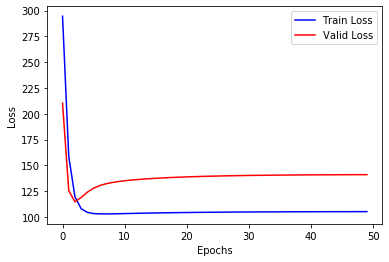

In [14]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_list_train, 'blue', label="Train Loss")
plt.plot(loss_list_valid, 'red', label="Valid Loss")
plt.legend(loc=1)

In [15]:
print("Test_loss:{:.4f}".format(loss(x_test, y_test, W, B).numpy()))

Test_loss:148.7692


In [16]:
test_house_id = np.random.randint(0, test_num)
y = y_test[test_house_id]

y_pred = model(x_test, W, B)[test_house_id]
y_predit = tf.reshape(y_pred,()).numpy()

print("House id", test_house_id, "Actual value", y, "Predicted value", y_predit)

House id 21 Actual value 14.2 Predicted value 22.714157
